## General Shaft Safety Calculation Example



<br><br>

this example calculates the safety and $d'$ of a shaft, starting from given forces and torques.  
Setting the direction along the sahft to be called $z$.  
The user is required to input $V_x$ & $V_y$ as well as $T$ $(=M_z)$.  
Assumptions:  
* There or no $M_x$ or $M_y$
* solid cilindrical shafts are assumed, code can be extended to handle hollow shafts.




In [12]:
# import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import rm_python_lib.MechDesign.Helpers as HM

from rm_python_lib.MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_, deg_, mu_m_
import rm_python_lib.MechDesign.Units.UnitMethods as UM

import rm_python_lib.MechDesign.RnM as RnM

In [13]:
S = RnM.Shaft()      # initialize new shaft
K_A_initial = 1    # setting a firs estimate of K_A

z = sp.Symbol('z')     # creating a symbol to express the length direction of the shaft

# starting with an example load
V_x = sp.Piecewise((0*N_,z<=0*mm_),(1721.5*N_,z<=31*mm_),(-3443*N_,z<=71*mm_),(1721.5*N_,z<=111*mm_)) * S.K_A
V_y = sp.Piecewise((-613.7*N_,z<=0*mm_),(1478*N_,z<=31*mm_),(-1253*N_,z<=71*mm_),(388.7*N_,z<=111*mm_)) * S.K_A 
temp = sp.integrate(V_x,z)    
M_y = sp.Piecewise(*temp.args[:-1])    #removing NaN part that is generated by the sp.integrate section
temp = sp.integrate(V_y,z)
M_x = sp.Piecewise(*temp.args[:-1])    #removing NaN part that is generated by the sp.integrate section
T = sp.Piecewise((75.76*N_*m_,z<=0*mm_),(-75.76*N_*m_,z<=71*mm_)) * S.K_A


HM.EqPrint('V_x',V_x)
HM.EqPrint('M_y',M_y)
HM.EqPrint('M_x',M_x)
HM.EqPrint('T',T)

# setting all to mm, 
M_y = UM.m_to_mm(M_y)
M_x = UM.m_to_mm(M_x)
T = UM.m_to_mm(T)
HM.EqPrint('V_x',V_x)
HM.EqPrint('M_y',M_y)
HM.EqPrint('M_x',M_x)
HM.EqPrint('T',T)
t=0

Eq(V_x, _K_A*Piecewise((0, z <= 0), (1722.0*N_, z <= 31*mm_), (-3443*N_, z <= 71*mm_), (1722.0*N_, z <= 111*mm_)))

Eq(M_y, Piecewise((0, z <= 0), (1722.0*_K_A*N_*z, z <= 31*mm_), (160100.0*_K_A*N_*mm_ - 3443*_K_A*N_*z, z <= 71*mm_), (-206600.0*_K_A*N_*mm_ + 1722.0*_K_A*N_*z, z <= 111*mm_)))

Eq(M_x, Piecewise((-613.7*_K_A*N_*z, z <= 0), (1478*_K_A*N_*z, z <= 31*mm_), (84661*_K_A*N_*mm_ - 1253*_K_A*N_*z, z <= 71*mm_), (-31900.0*_K_A*N_*mm_ + 388.7*_K_A*N_*z, z <= 111*mm_)))

Eq(T, _K_A*Piecewise((75.76*N_*m_, z <= 0), (-75.76*N_*m_, z <= 71*mm_)))

Eq(V_x, _K_A*Piecewise((0, z <= 0), (1722.0*N_, z <= 31*mm_), (-3443*N_, z <= 71*mm_), (1722.0*N_, z <= 111*mm_)))

Eq(M_y, Piecewise((0, z <= 0), (1722.0*_K_A*N_*z, z <= 31*mm_), (160100.0*_K_A*N_*mm_ - 3443.0*_K_A*N_*z, z <= 71*mm_), (-206600.0*_K_A*N_*mm_ + 1722.0*_K_A*N_*z, z <= 111*mm_)))

Eq(M_x, Piecewise((-613.7*_K_A*N_*z, z <= 0), (1478.0*_K_A*N_*z, z <= 31*mm_), (84660.0*_K_A*N_*mm_ - 1253.0*_K_A*N_*z, z <= 71*mm_), (-31900.0*_K_A*N_*mm_ + 388.7*_K_A*N_*z, z <= 111*mm_)))

Eq(T, _K_A*Piecewise((75760.0*N_*mm_, z <= 0), (-75760.0*N_*mm_, z <= 71*mm_)))

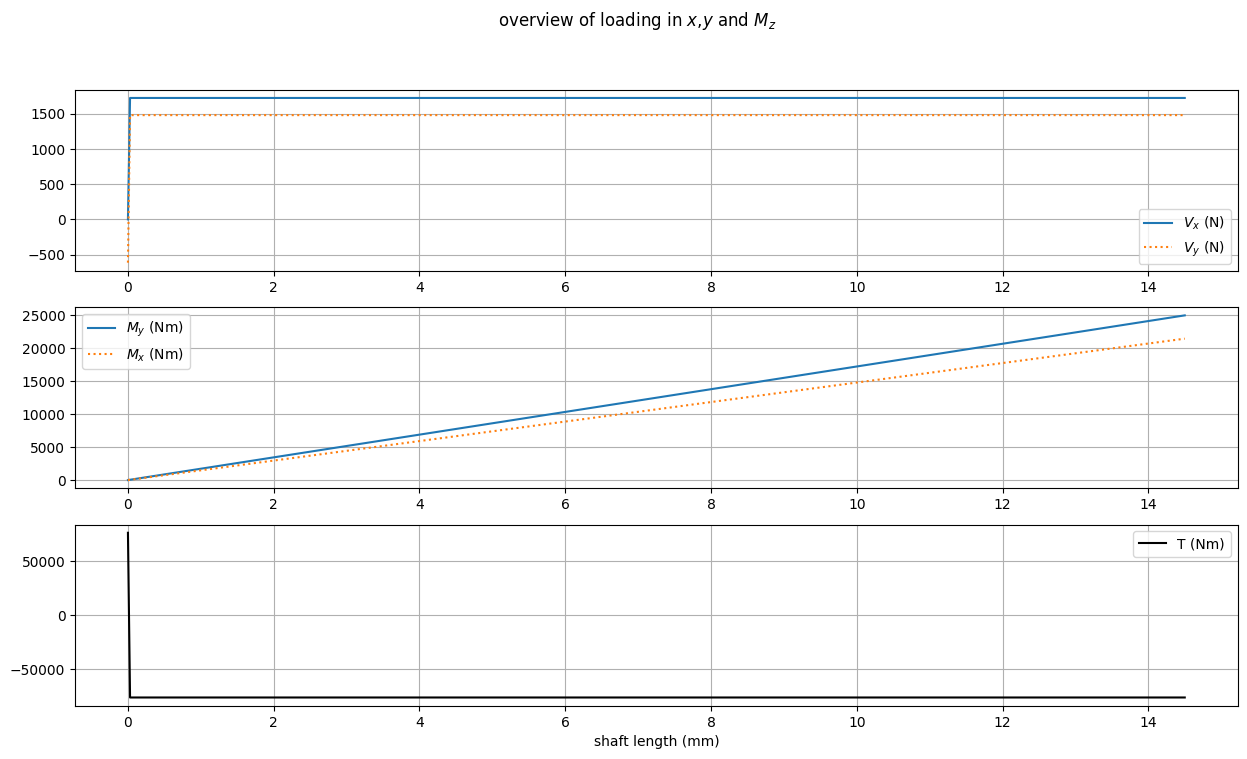

In [ ]:
## V,M,T graph
# step 0, create list of values for the x axis of the figure (in this case called z_val)
z_val = np.linspace(0,600,500)  # the max of the length of the shaft, 500 points
# step 1A, substitute with known values
V_x1 = HM.substitute(V_x,S,K_A = K_A_initial)
V_y1 = HM.substitute(V_y,S,K_A = K_A_initial)
M_y1 = HM.substitute(M_y,S,K_A = K_A_initial)
M_x1 = HM.substitute(M_x,S,K_A = K_A_initial)
T1 = HM.substitute(T,S,K_A = K_A_initial)
# step 1B, evaluate 
y_V_x = HM.evaluate(V_x1,{'z':z_val})
y_M_y = HM.evaluate(M_y1,{'z':z_val})
y_V_y = HM.evaluate(V_y1,{'z':z_val})
y_M_x = HM.evaluate(M_x1,{'z':z_val})
y_T = HM.evaluate(T1,{'z':z_val})
# step 2  graph
fig1,ax1 = plt.subplots(3,1,figsize=(15, 8)) 
line1 = ax1[0].plot(z_val,y_V_x,label=f'$V_x$ (N)')
line1 = ax1[0].plot(z_val,y_V_y,label=f'$V_y$ (N)',linestyle=':')
line3 = ax1[1].plot(z_val,y_M_y,label=f'$M_y$ (Nm)')
line3 = ax1[1].plot(z_val,y_M_x,label=f'$M_x$ (Nm)',linestyle=':')
line5 = ax1[2].plot(z_val,y_T,label='T (Nm)',color='k')

for a in ax1: 
    a.legend()
    a.grid() 
ax1[2].set_xlabel('shaft length (mm)')
fig1.suptitle(f'overview of loading in $x$,$y$ and $M_z$')
t=0

In [15]:

# some numbers, to be alterd according to use case
K_t = 1
sigma_bWN = 400 * N_/mm_**2
K_A = 1
S.sigma_bToel = K_t * sigma_bWN
S.sigma_max = S.sigma_bToel
S.tau_max  = S.sigma_max  *  1.2/(3**(1.3))


S.T = T
S.M_b = sp.sqrt(M_x**2+M_y**2)
HM.EqPrint('M_b',S.M_b)
S.phi = 1
S.M_v = S.E11_7A_MomentOfComparison()
#S.M_v = HM.substitute(S.M_v,S)
t=HM.EqPrint('M_v',S.M_v)    #print out to verify that units are consistent. 
t=0

Eq(M_b, (Piecewise((0, z <= 0), (2964000.0*_K_A**2*N_**2*z**2, z <= 31*mm_), ((160100.0*_K_A*N_*mm_ - 3443.0*_K_A*N_*z)**2, z <= 71*mm_), ((-206600.0*_K_A*N_*mm_ + 1722.0*_K_A*N_*z)**2, z <= 111*mm_)) + Piecewise((376600.0*_K_A**2*N_**2*z**2, z <= 0), (2184000.0*_K_A**2*N_**2*z**2, z <= 31*mm_), ((84660.0*_K_A*N_*mm_ - 1253.0*_K_A*N_*z)**2, z <= 71*mm_), ((-31900.0*_K_A*N_*mm_ + 388.7*_K_A*N_*z)**2, z <= 111*mm_)))**0.5)

Eq(M_v, (9.062*_K_A**2*Piecewise((5740000000.0*N_**2*mm_**2, (z <= 0) | (z <= 71*mm_))) + Piecewise((0, z <= 0), (2964000.0*_K_A**2*N_**2*z**2, z <= 31*mm_), ((160100.0*_K_A*N_*mm_ - 3443.0*_K_A*N_*z)**2, z <= 71*mm_), ((-206600.0*_K_A*N_*mm_ + 1722.0*_K_A*N_*z)**2, z <= 111*mm_)) + Piecewise((376600.0*_K_A**2*N_**2*z**2, z <= 0), (2184000.0*_K_A**2*N_**2*z**2, z <= 31*mm_), ((84660.0*_K_A*N_*mm_ - 1253.0*_K_A*N_*z)**2, z <= 71*mm_), ((-31900.0*_K_A*N_*mm_ + 388.7*_K_A*N_*z)**2, z <= 111*mm_)))**0.5)

In [16]:
## !!!!! be sure to set the correct equation !!!!! 
## the 'B' versions of 11.16 and 11.17 are implemented to use M_v as the value for M_b, as per flow chart. 

S.dprime = S.E11_16B_DesignDiameter()
HM.EqPrint('dprime',S.dprime)
t=0

Eq(dprime, 0.461404917667158*mm_**0.6667*(9.062*_K_A**2*Piecewise((5740000000.0*N_**2*mm_**2, (z <= 0) | (z <= 71*mm_))) + Piecewise((0, z <= 0), (2964000.0*_K_A**2*N_**2*z**2, z <= 31*mm_), ((160100.0*_K_A*N_*mm_ - 3443.0*_K_A*N_*z)**2, z <= 71*mm_), ((-206600.0*_K_A*N_*mm_ + 1722.0*_K_A*N_*z)**2, z <= 111*mm_)) + Piecewise((376600.0*_K_A**2*N_**2*z**2, z <= 0), (2184000.0*_K_A**2*N_**2*z**2, z <= 31*mm_), ((84660.0*_K_A*N_*mm_ - 1253.0*_K_A*N_*z)**2, z <= 71*mm_), ((-31900.0*_K_A*N_*mm_ + 388.7*_K_A*N_*z)**2, z <= 111*mm_)))**0.1667/N_**0.3333)

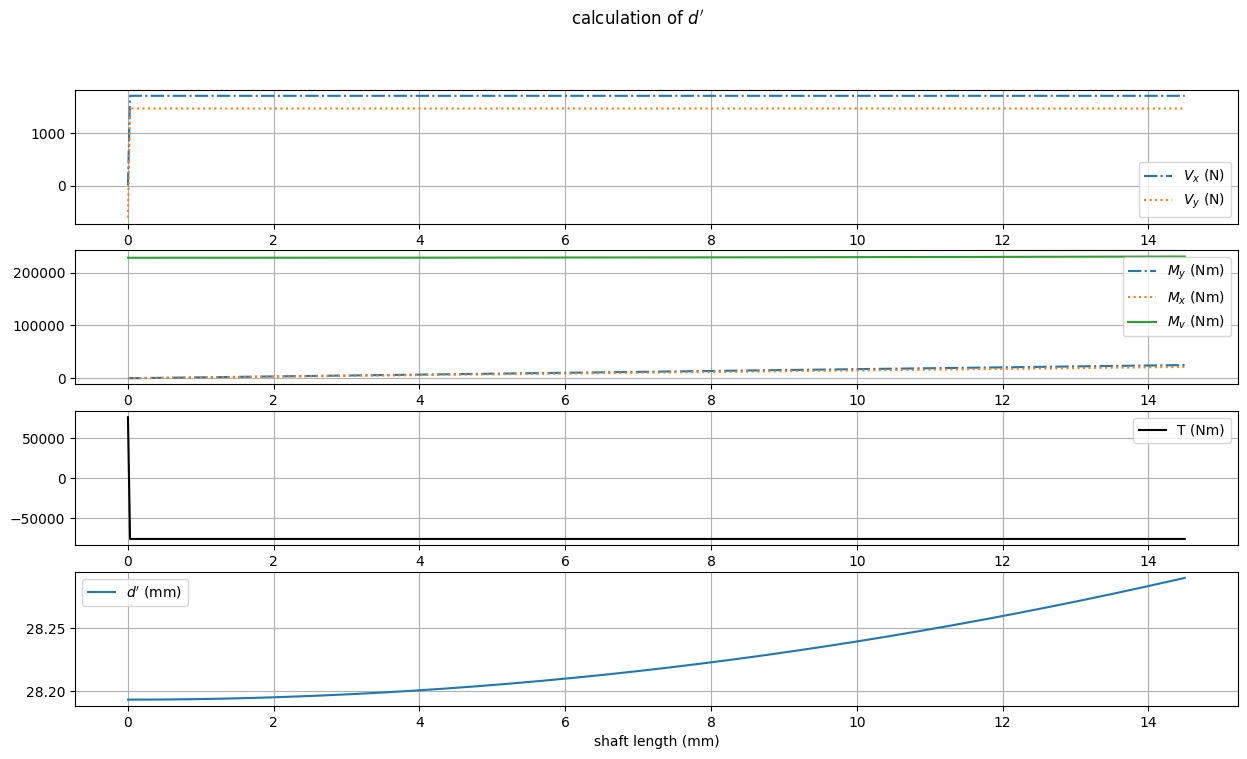

In [17]:
# creating  a second graph on dprime
# step1, A&B, evaluate the function
dprime1 = HM.substitute(S.dprime,S,K_A = K_A_initial)
M_v1 = HM.substitute(S.M_v,S,K_A = K_A_initial)
y_dprime = HM.evaluate(dprime1,{'z':z_val})
y_M_v = HM.evaluate(M_v1,{'z':z_val})


fig2,ax2 = plt.subplots(4,1,figsize=(15, 8)) 
line1 = ax2[0].plot(z_val,y_V_x,label=f'$V_x$ (N)',linestyle='-.')
line1 = ax2[0].plot(z_val,y_V_y,label=f'$V_y$ (N)',linestyle=':')
line3 = ax2[1].plot(z_val,y_M_y,label=f'$M_y$ (Nm)',linestyle='-.')
line4 = ax2[1].plot(z_val,y_M_x,label=f'$M_x$ (Nm)',linestyle=':')
line5 = ax2[1].plot(z_val,y_M_v,label=f'$M_v$ (Nm)',linestyle='-')
line6 = ax2[2].plot(z_val,y_T,label='T (Nm)',color='k')
line7 = ax2[3].plot(z_val,y_dprime,label = f"$d'$ (mm)")

for a in ax2: 
    a.legend()
    a.grid() 
ax2[3].set_xlabel('shaft length (mm)')
fig2.suptitle(f"calculation of $d'$")
t=0



In [18]:
## next we will compare a chosen diameter to a required safety level. 

d = sp.Piecewise((50*mm_,z<=20*mm_),(80*mm_,z<=260*mm_),(70*mm_,z<=500*mm_),(30*mm_,z<=600*mm_))


# because we could need different values of K_A for different sections of the calculations, 
# in this example we will do this with a K_A value
# note the verify in detail if the following does apply in your situation

K_A_S_V = 2.5  # new K_A value

K_t = 0.92  # table 3-11, yield strength and 65mm diameter
R_pO2N = 295 * N_/mm_**2
sigma_bv = 1.2*R_pO2N*K_t
tau_tv = sigma_bv/sp.sqrt(3).evalf()
HM.EqPrint('sigma_bv',sigma_bv)
HM.EqPrint('tau_tv',tau_tv)


W_b = sp.pi/32*d**3  
HM.EqPrint('W_b',W_b)
W_t = sp.pi/16*d**3  
HM.EqPrint('W_t',W_t)

# recalculating with new K_A values
V_x2 = HM.substitute(V_x,S,K_A=K_A_S_V)
V_y2 = HM.substitute(V_y,S,K_A=K_A_S_V)
HM.EqPrint('V_x2',V_x2)
M_b2 = HM.substitute(S.M_b,S,K_A=K_A_S_V)
HM.EqPrint('M_b2',M_b2)
T2 = UM.m_to_mm(HM.substitute(S.T,S,K_A=K_A_S_V))
HM.EqPrint('T2',T2)

sigma = M_b2/W_b
HM.EqPrint('sigma',sigma)
tau = T2/W_t
HM.EqPrint('tau',tau)


S_V= 1/sp.sqrt((sigma/sigma_bv)**2+(tau/tau_tv)**2)
HM.EqPrint('S_V',S_V)

Eq(sigma_bv, 325.7*N_/mm_**2)

Eq(tau_tv, 188.0*N_/mm_**2)

Eq(W_b, 0.03125*pi*Piecewise((125000*mm_**3, z <= 20*mm_), (512000*mm_**3, z <= 260*mm_), (343000*mm_**3, z <= 500*mm_), (27000*mm_**3, z <= 600*mm_)))

Eq(W_t, 0.0625*pi*Piecewise((125000*mm_**3, z <= 20*mm_), (512000*mm_**3, z <= 260*mm_), (343000*mm_**3, z <= 500*mm_), (27000*mm_**3, z <= 600*mm_)))

Eq(V_x2, 2.5*Piecewise((0, z <= 0), (1722.0*N_, z <= 31*mm_), (-3443.0*N_, z <= 71*mm_), (1722.0*N_, z <= 111*mm_)))

Eq(M_b2, (Piecewise((0, z <= 0), (18520000.0*N_**2*z**2, z <= 31*mm_), ((400200.0*N_*mm_ - 8608.0*N_*z)**2, z <= 71*mm_), ((-516400.0*N_*mm_ + 4304.0*N_*z)**2, z <= 111*mm_)) + Piecewise((2354000.0*N_**2*z**2, z <= 0), (13650000.0*N_**2*z**2, z <= 31*mm_), ((211700.0*N_*mm_ - 3132.0*N_*z)**2, z <= 71*mm_), ((-79750.0*N_*mm_ + 971.8*N_*z)**2, z <= 111*mm_)))**0.5)

Eq(T2, 2.5*Piecewise((75760.0*N_*mm_, z <= 0), (-75760.0*N_*mm_, z <= 71*mm_)))

Eq(sigma, 32*(Piecewise((0, z <= 0), (18520000.0*N_**2*z**2, z <= 31*mm_), ((400200.0*N_*mm_ - 8608.0*N_*z)**2, z <= 71*mm_), ((-516400.0*N_*mm_ + 4304.0*N_*z)**2, z <= 111*mm_)) + Piecewise((2354000.0*N_**2*z**2, z <= 0), (13650000.0*N_**2*z**2, z <= 31*mm_), ((211700.0*N_*mm_ - 3132.0*N_*z)**2, z <= 71*mm_), ((-79750.0*N_*mm_ + 971.8*N_*z)**2, z <= 111*mm_)))**0.5*Piecewise((8.0e-6/mm_**3, z <= 20*mm_), (1.953e-6/mm_**3, z <= 260*mm_), (2.915e-6/mm_**3, z <= 500*mm_), (3.704e-5/mm_**3, z <= 600*mm_))/pi)

Eq(tau, 40.0*Piecewise((75760.0*N_*mm_, z <= 0), (-75760.0*N_*mm_, z <= 71*mm_))*Piecewise((8.0e-6/mm_**3, z <= 20*mm_), (1.953e-6/mm_**3, z <= 260*mm_), (2.915e-6/mm_**3, z <= 500*mm_), (3.704e-5/mm_**3, z <= 600*mm_))/pi)

Eq(S_V, (0.009654*mm_**4*(Piecewise((0, z <= 0), (18520000.0*N_**2*z**2, z <= 31*mm_), ((400200.0*N_*mm_ - 8608.0*N_*z)**2, z <= 71*mm_), ((-516400.0*N_*mm_ + 4304.0*N_*z)**2, z <= 111*mm_)) + Piecewise((2354000.0*N_**2*z**2, z <= 0), (13650000.0*N_**2*z**2, z <= 31*mm_), ((211700.0*N_*mm_ - 3132.0*N_*z)**2, z <= 71*mm_), ((-79750.0*N_*mm_ + 971.8*N_*z)**2, z <= 111*mm_)))**1.0*Piecewise((6.4e-11/mm_**6, z <= 20*mm_), (3.815e-12/mm_**6, z <= 260*mm_), (8.5e-12/mm_**6, z <= 500*mm_), (1.372e-9/mm_**6, z <= 600*mm_))/(pi**2*N_**2) + 0.04525*mm_**4*Piecewise((5740000000.0*N_**2*mm_**2, (z <= 0) | (z <= 71*mm_)))*Piecewise((6.4e-11/mm_**6, z <= 20*mm_), (3.815e-12/mm_**6, z <= 260*mm_), (8.5e-12/mm_**6, z <= 500*mm_), (1.372e-9/mm_**6, z <= 600*mm_))/(pi**2*N_**2))**(-0.5))

Eq(S_V, (0.009654*mm_**4*(Piecewise((0, z <= 0), (18520000.0*N_**2*z**2, z <= 31*mm_), ((400200.0*N_*mm_ - 8608.0*N_*z)**2, z <= 71*mm_), ((-516400.0*N_*mm_ + 4304.0*N_*z)**2, z <= 111*mm_)) + Piecewise((2354000.0*N_**2*z**2, z <= 0), (13650000.0*N_**2*z**2, z <= 31*mm_), ((211700.0*N_*mm_ - 3132.0*N_*z)**2, z <= 71*mm_), ((-79750.0*N_*mm_ + 971.8*N_*z)**2, z <= 111*mm_)))**1.0*Piecewise((6.4e-11/mm_**6, z <= 20*mm_), (3.815e-12/mm_**6, z <= 260*mm_), (8.5e-12/mm_**6, z <= 500*mm_), (1.372e-9/mm_**6, z <= 600*mm_))/(pi**2*N_**2) + 0.04525*mm_**4*Piecewise((5740000000.0*N_**2*mm_**2, (z <= 0) | (z <= 71*mm_)))*Piecewise((6.4e-11/mm_**6, z <= 20*mm_), (3.815e-12/mm_**6, z <= 260*mm_), (8.5e-12/mm_**6, z <= 500*mm_), (1.372e-9/mm_**6, z <= 600*mm_))/(pi**2*N_**2))**(-0.5))

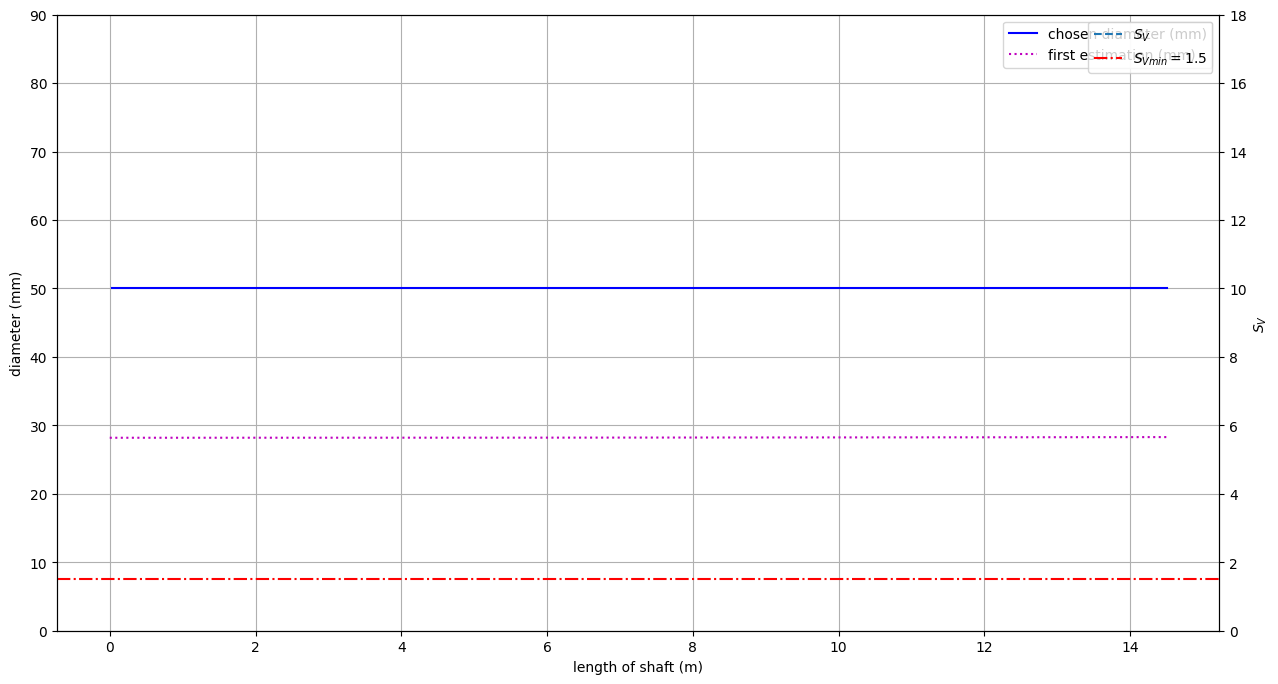

In [19]:
z_val2 = z_val[1::]  # since there is no bending moment in the very first point of the shaft, using the original x_val would result in a warning. 
y_S_V_inv = HM.evaluate(1/S_V,{'z':z_val2})
y_S_V = [1/x if x!=0 else float("nan") for x in y_S_V_inv]

# creating a plot
fig3,ax3 = plt.subplots(1,1,figsize=(15, 8)) 
y_d = HM.evaluate(d,{'z':z_val2})
ax3.plot(z_val2,y_d,label='chosen diameter (mm)',c='b')
ax3.plot(z_val,y_dprime,label='first estimation (mm)',c='m',linestyle=':')
ax3.legend()
ax3.grid()
ax3.set_xlabel('length of shaft (m)')
ax3.set_ylabel('diameter (mm)')
ax3.set_ylim(0,90)
ax3b = ax3.twinx()
ax3b.plot(z_val2,y_S_V,linestyle='--',label=r'$S_V$')
ax3b.set_ylim(0,18)
ax3b.set_ylabel(r'$S_V$')
ax3b.axhline(1.5,c='r',label=r'$S_{Vmin} = 1.5$',linestyle='-.')
ax3b.legend()
t=0


 --- ---
 
 ### dynamic safety factor, $S_D$
 We will calculate the dynamic safety factor, including the effect of the key.  Since we will incorporate the key using stress concentration factors, we do not need to take it into account for $W_b$
 
 * $K_A = 1.2$ (per assignment)
 * $K_t = 1$ (dynamic loading -> line 1 in table 3-11a)
 * $R_{mN} = 470 {N \over mm^2}$ (E295 in tabel 1-1)
 * $\beta_{kb} = 1.7$ (milled keyway in shaft, table 3-8)
 * $R_z = 12.5 \mu m$ (comment next to table 3-10)
 * $K_{O \sigma} = 0.91 $ ($R_{mN} = 470 {N \over mm^2}$ and $R_z = 12.5 \mu m$ in table 3-10a)
 * $K_{g \sigma} = 0.85 $ (bending and diameter 65 in table 3-11c)
 * $K_V = 1 $ (no surface strengthening defined, table 3-12 )
 * $S_z = 1.2$ (table 3-14c)
 * $S_Dmin = 1.5$ (table 3-14a)
 

In [20]:
# implemented some values, to be changed according to your problem. 
K_A_S_D = 1.2
K_t = 1
R_mN = 470 *N_ / mm_**2
beta_kb = 1.75
R_z = 12.5 *mu_m_
K_O_sigma = 0.91 
K_g_sigma = 0.85 
K_V = 1

S_z = 1.2
S_Dmin = 1.5

R_m = K_t * R_mN
K_sigma = (beta_kb/K_g_sigma + 1/K_O_sigma -1)*1/K_V
HM.EqPrint('K_sigma',K_sigma)

sigma_GW = sigma_bWN * K_t / K_sigma
HM.EqPrint('sigma_GW',sigma_GW)

# recalculating with new K_A values
V_x3 = HM.substitute(V_x,S,K_A=K_A_S_D)
V_y3 = HM.substitute(V_y,S,K_A=K_A_S_D)
HM.EqPrint('V_x3',V_x3)
M_b3 = HM.substitute(S.M_b,S,K_A=K_A_S_D)
HM.EqPrint('M_b3',M_b3)
T3 = UM.m_to_mm(HM.substitute(S.T,S,K_A=K_A_S_D))
HM.EqPrint('T3',T3)



sigma_ba = M_b3/W_b
sigma_ba = sigma_ba.evalf()
HM.EqPrint('sigma_ba',sigma_ba)

y_sigma_ba = HM.evaluate(sigma_ba,{'z':z_val2})


S_D = sigma_GW/sigma_ba
HM.EqPrint('S_D',S_D)
display(S_D.free_symbols)
# replace the values equal to infinity with zero, needed for evaluation to work
S_D = S_D.subs({sp.zoo:0})
HM.EqPrint('S_D',S_D)

Eq(K_sigma, 2.158)

Eq(sigma_GW, 185.4*N_/mm_**2)

Eq(V_x3, 1.2*Piecewise((0, z <= 0), (1722.0*N_, z <= 31*mm_), (-3443.0*N_, z <= 71*mm_), (1722.0*N_, z <= 111*mm_)))

Eq(M_b3, (Piecewise((0, z <= 0), (4268000.0*N_**2*z**2, z <= 31*mm_), ((192100.0*N_*mm_ - 4132.0*N_*z)**2, z <= 71*mm_), ((-247900.0*N_*mm_ + 2066.0*N_*z)**2, z <= 111*mm_)) + Piecewise((542300.0*N_**2*z**2, z <= 0), (3146000.0*N_**2*z**2, z <= 31*mm_), ((101600.0*N_*mm_ - 1504.0*N_*z)**2, z <= 71*mm_), ((-38280.0*N_*mm_ + 466.4*N_*z)**2, z <= 111*mm_)))**0.5)

Eq(T3, 1.2*Piecewise((75760.0*N_*mm_, z <= 0), (-75760.0*N_*mm_, z <= 71*mm_)))

Eq(sigma_ba, 10.19*(Piecewise((0, z <= 0), (4268000.0*N_**2*z**2, z <= 31*mm_), ((192100.0*N_*mm_ - 4132.0*N_*z)**2, z <= 71*mm_), ((-247900.0*N_*mm_ + 2066.0*N_*z)**2, z <= 111*mm_)) + Piecewise((542300.0*N_**2*z**2, z <= 0), (3146000.0*N_**2*z**2, z <= 31*mm_), ((101600.0*N_*mm_ - 1504.0*N_*z)**2, z <= 71*mm_), ((-38280.0*N_*mm_ + 466.4*N_*z)**2, z <= 111*mm_)))**0.5*Piecewise((8.0e-6/mm_**3, z <= 20*mm_), (1.953e-6/mm_**3, z <= 260*mm_), (2.915e-6/mm_**3, z <= 500*mm_), (3.704e-5/mm_**3, z <= 600*mm_)))

Eq(S_D, 18.2*N_*Piecewise((125000.0*mm_**3, z <= 20*mm_), (512000.0*mm_**3, z <= 260*mm_), (343000.0*mm_**3, z <= 500*mm_), (27000.0*mm_**3, z <= 600*mm_))/(mm_**2*(Piecewise((0, z <= 0), (4268000.0*N_**2*z**2, z <= 31*mm_), ((192100.0*N_*mm_ - 4132.0*N_*z)**2, z <= 71*mm_), ((-247900.0*N_*mm_ + 2066.0*N_*z)**2, z <= 111*mm_)) + Piecewise((542300.0*N_**2*z**2, z <= 0), (3146000.0*N_**2*z**2, z <= 31*mm_), ((101600.0*N_*mm_ - 1504.0*N_*z)**2, z <= 71*mm_), ((-38280.0*N_*mm_ + 466.4*N_*z)**2, z <= 111*mm_)))**0.5))

{N_, mm_, z}

Eq(S_D, 18.2*N_*Piecewise((125000.0*mm_**3, z <= 20*mm_), (512000.0*mm_**3, z <= 260*mm_), (343000.0*mm_**3, z <= 500*mm_), (27000.0*mm_**3, z <= 600*mm_))/(mm_**2*(Piecewise((0, z <= 0), (4268000.0*N_**2*z**2, z <= 31*mm_), ((192100.0*N_*mm_ - 4132.0*N_*z)**2, z <= 71*mm_), ((-247900.0*N_*mm_ + 2066.0*N_*z)**2, z <= 111*mm_)) + Piecewise((542300.0*N_**2*z**2, z <= 0), (3146000.0*N_**2*z**2, z <= 31*mm_), ((101600.0*N_*mm_ - 1504.0*N_*z)**2, z <= 71*mm_), ((-38280.0*N_*mm_ + 466.4*N_*z)**2, z <= 111*mm_)))**0.5))

Eq(S_D, 18.2*N_*Piecewise((125000.0*mm_**3, z <= 20*mm_), (512000.0*mm_**3, z <= 260*mm_), (343000.0*mm_**3, z <= 500*mm_), (27000.0*mm_**3, z <= 600*mm_))/(mm_**2*(Piecewise((0, z <= 0), (4268000.0*N_**2*z**2, z <= 31*mm_), ((192100.0*N_*mm_ - 4132.0*N_*z)**2, z <= 71*mm_), ((-247900.0*N_*mm_ + 2066.0*N_*z)**2, z <= 111*mm_)) + Piecewise((542300.0*N_**2*z**2, z <= 0), (3146000.0*N_**2*z**2, z <= 31*mm_), ((101600.0*N_*mm_ - 1504.0*N_*z)**2, z <= 71*mm_), ((-38280.0*N_*mm_ + 466.4*N_*z)**2, z <= 111*mm_)))**0.5))

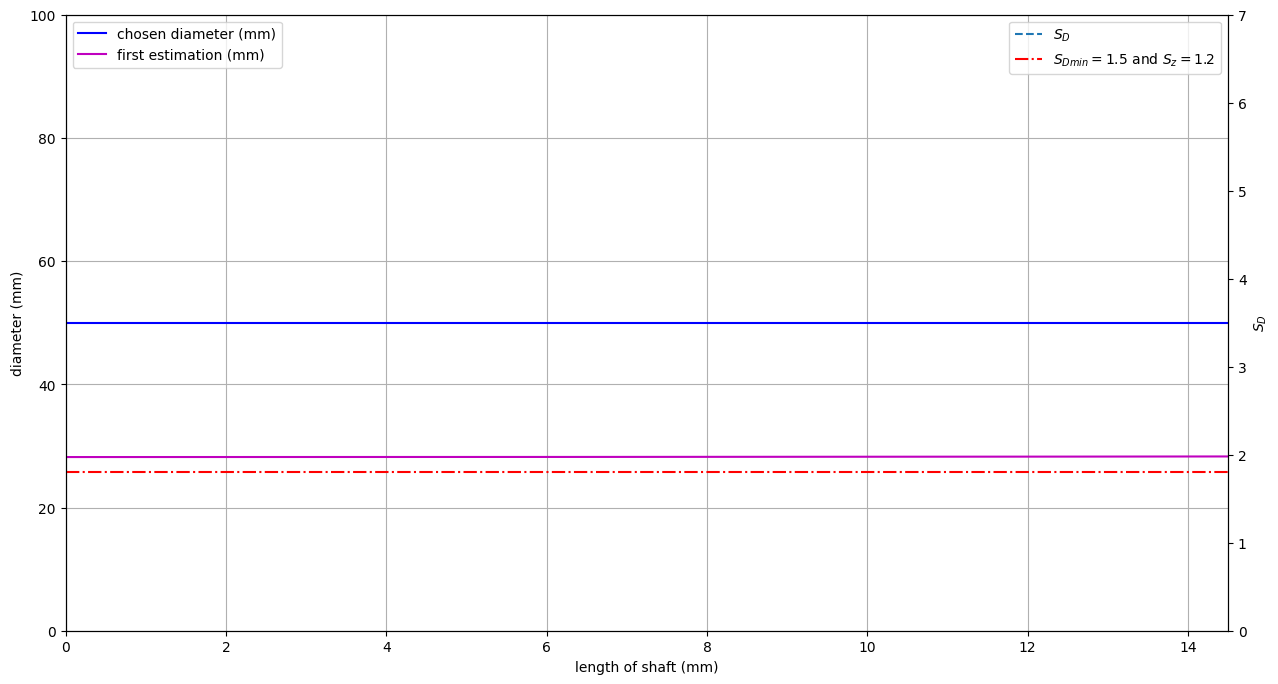

In [21]:
# creating a plot
fig4,ax4 = plt.subplots(1,1,figsize=(15, 8)) 
y_d = HM.evaluate((d),{'z':z_val2})
ax4.plot(z_val2,y_d,label='chosen diameter (mm)',c='b')
ax4.plot(z_val,y_dprime,label='first estimation (mm)',c='m')
ax4.legend(loc='upper left')
ax4.grid()
ax4.set_xlabel('length of shaft (mm)')
ax4.set_ylabel('diameter (mm)')
ax4.set_ylim(0,100)
ax4b = ax4.twinx()
y_S_D =  HM.evaluate(S_D,{'z':z_val2})
ax4b.plot(z_val2,y_S_D,linestyle='--',label=r'$S_D$')
ax4b.set_ylim(0,7)
ax4b.set_ylabel(r'$S_D$')
ax4b.axhline(S_Dmin*S_z,c='r',label=r'$S_{Dmin} = 1.5$ and $S_z = 1.2$',linestyle='-.')
ax4b.legend(loc='upper right')
ax4.set_xlim([0,z_val2[-1]])
t=0